# Predicting insurance 


* Predictive analysis of insurance charges based on age,sex,and bmi

* Data was sourced from Kaggle

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurance = pd.read_csv('data/medical_insurance.csv')

In [5]:
insurance.head()

,age,sex,bmi,charges
0,19,female,27.900,16884.92400
1,18,male,33.770,1725.55230
2,28,male,33.000,4449.46200
3,33,male,22.705,21984.47061
4,32,male,28.880,3866.85520


In [6]:
insurance.shape

(2772, 4)

In [7]:
insurance.isnull().sum()

age        0
sex        0
bmi        0
charges    0
dtype: int64

In [8]:
insurance.describe()

,age,bmi,charges
count,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,13261.369959
std,14.081459,6.129449,12151.768945
min,18.000000,15.960000,1121.873900
25%,26.000000,26.220000,4687.797000
50%,39.000000,30.447500,9333.014350
75%,51.000000,34.770000,16577.779500
max,64.000000,53.130000,63770.428010


# Notes: 
For age, 68% of the data(age) fall within 1 std  of the mean (25.03 to 53.19)

Approximately 95% of the data  fall within 2 standard deviations (10.95 to 67.27).

Within 3 standard deviations:
Approximately 99.7% of the data  fall within 3 standard deviations (0 to 81.35).

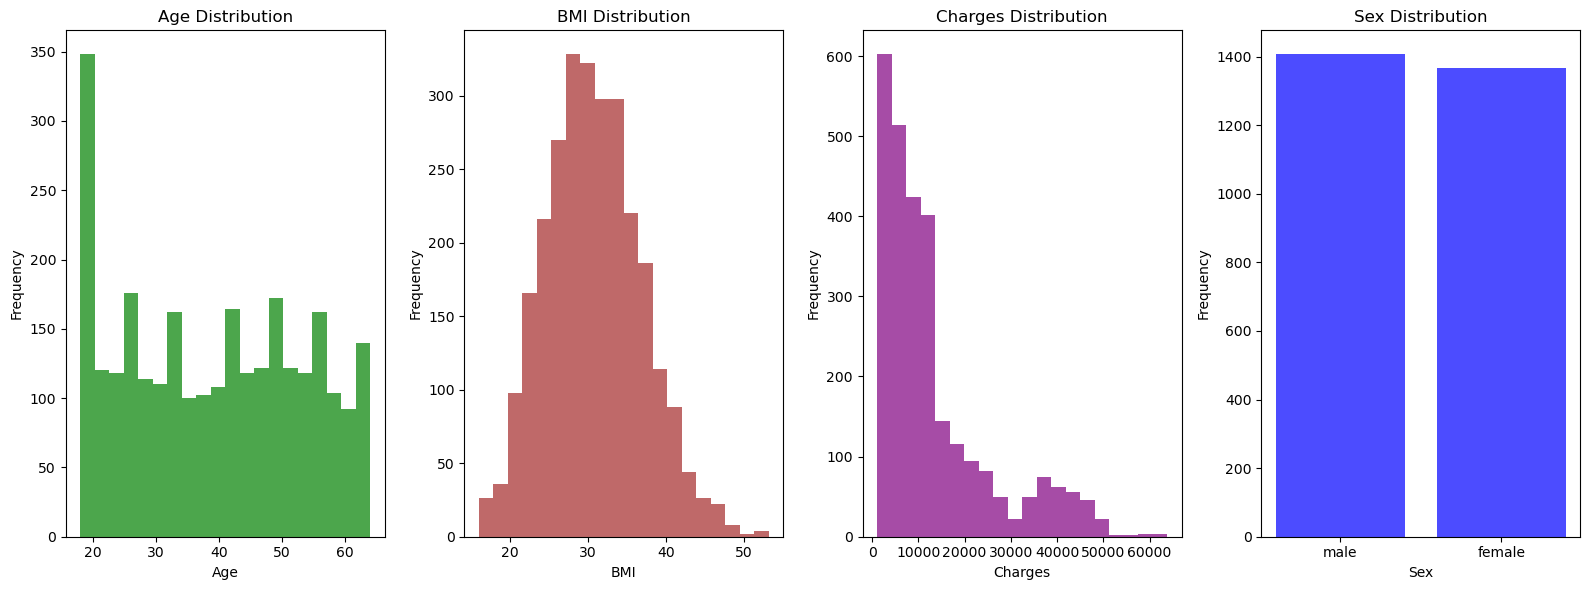

In [9]:
fig, axes = plt.subplots(1, 4, figsize = (16,6))

axes[0].hist(insurance['age'], bins = 20, color = 'green', alpha = 0.7)
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0]. set_ylabel('Frequency')

axes[1].hist(insurance['bmi'], bins = 20, color = 'brown', alpha = 0.7)
axes[1].set_title('BMI Distribution')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

axes[2].hist(insurance['charges'], bins = 20, color = 'purple', alpha = 0.7) 
axes[2].set_title('Charges Distribution')
axes[2].set_xlabel('Charges')
axes[2].set_ylabel('Frequency')

sex_counts = insurance['sex'].value_counts()
axes[3].bar(sex_counts.index, sex_counts.values, color='blue', alpha=0.7)
axes[3].set_title('Sex Distribution')
axes[3].set_xlabel('Sex')
axes[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# According to Research:

Underweight: BMI below 18.5
Healthy weight: BMI between 18.6 and 24.9
Overweight: BMI between 25.0 and 29.9 
Obese: BMI of 30 and above

Reference: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

In [10]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "underweight"
    elif 18.5 <= bmi <24.9:
        return "normal_weight"
    elif 25.0 <= bmi <29.9:
        return "overweight"        
    else:
        return 'obese'
insurance['bmi_category'] = insurance['bmi'].apply(categorize_bmi)

In [11]:
# check for skewness
insurance[['age', 'bmi','charges']].skew()

age        0.061639
bmi        0.279944
charges    1.511315
dtype: float64

Applying a log transformation will reduce skewness and allow the data to be closer to being normally distributed. This will also help the model's performance and help reduce the impace of outliers.


In [12]:
insurance['log_charges'] = np.log(insurance['charges'])
log_skewness = insurance['log_charges'].skew()
print(f'skewness after applying log transformation is: {log_skewness}')

skewness after applying log transformation is: -0.08908723369715708


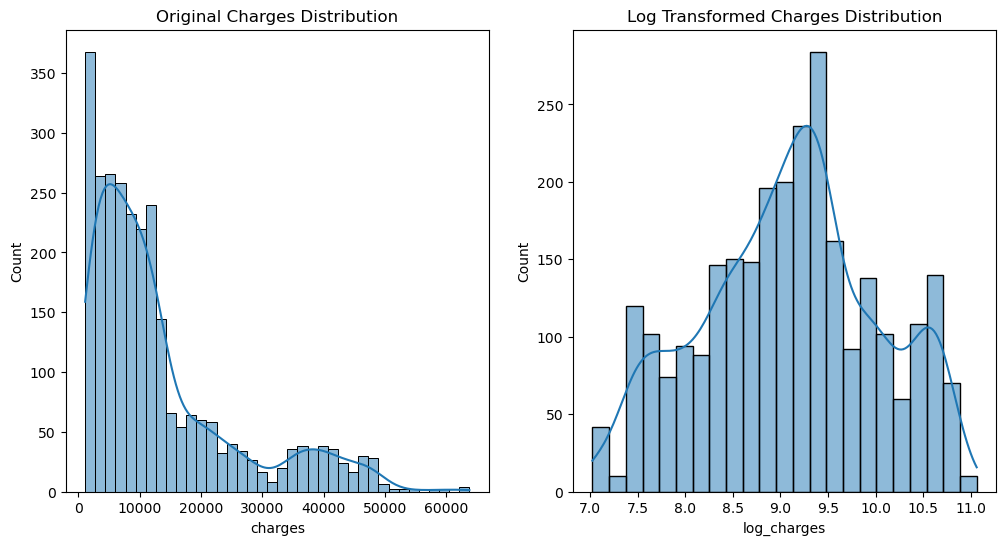

In [13]:
plt.figure(figsize = (12,6))

plt.subplot(1, 2, 1)
sns.histplot(insurance['charges'], kde=True)
plt.title('Original Charges Distribution')

plt.subplot(1, 2, 2)
sns.histplot(insurance['log_charges'], kde=True)
plt.title('Log Transformed Charges Distribution')

plt.show()

In [14]:
# Encode categorical features
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoded_sex = encoder.fit_transform(insurance[['sex']])
insurance['encoded_sex'] = encoded_sex

encoded_bmi_category = encoder.fit_transform(insurance[['bmi_category']])
insurance['encoded_bmi_category'] = encoded_bmi_category 

In [15]:
insurance.head()

,age,sex,bmi,charges,bmi_category,log_charges,encoded_sex,encoded_bmi_category
0,19,female,27.900,16884.92400,overweight,9.734176,0.0,2.0
1,18,male,33.770,1725.55230,obese,7.453302,1.0,1.0
2,28,male,33.000,4449.46200,obese,8.400538,1.0,1.0
3,33,male,22.705,21984.47061,normal_weight,9.998092,1.0,0.0
4,32,male,28.880,3866.85520,overweight,8.260197,1.0,2.0


# Regression 

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# List of features to be included in the model
drop_features = insurance.columns.drop(['sex', 'bmi_category'])

# List of features to be included in the model
features = ['age', 'log_charges', 'encoded_bmi_category', 'encoded_sex']

# Initialize the scaler
scaler = StandardScaler()

# Normalize the features
insurance[features] = scaler.fit_transform(insurance[features])

# Features and target
X = insurance[features]
y = insurance['charges']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mean_sq_error = mean_squared_error(y_test,y_pred)
root_mean_sq_error = np.sqrt(mean_sq_error)
r2 = r2_score(y_test,y_pred)

#print(f'Mean Squared Error is {mean_sq_error}')
print(f'Root Mean Squared Error is {root_mean_sq_error}')
print(f'R-Squared: {r2}')

Root Mean Squared Error is 5350.088682882039
R-Squared: 0.8135048839846266
